## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Імпорт даних та зчитування даних


In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/Colab Notebooks/bank-additional-full.csv', sep = None, engine="python")

Mounted at /content/drive


In [3]:
df_model = df.copy() # цей датафрейм будемо використовувати для препроцесингу та моделювання

In [4]:
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Перевірка структури даних


In [5]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.shape

(41188, 21)

Ми маємо 21 колонку ознак та 41188 рядків, 11 колонок категоріальні, нульових значень немає.

#Статистичний звіт для числових змінних


In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Інтерпретація по змінних



**age:**

Середній вік ≈ 40 років, розкид ~10 років.\
Мінімум 17, максимум 98 є як дуже молоді, так і літні клієнти.

**duration (тривалість дзвінка, сек.):**

Середня ≈ 258 сек ~4 хв, але максимум майже 5000 сек ~1.5 год.
Дуже велика варіація : є як короткі дзвінки, так і дуже довгі.

**campaign (кількість контактів у цій кампанії):**

Медіана = 2, але максимум = 56 є клієнти, яких контактували багато разів.

**pdays (дні з моменту останнього контакту):**

Значення 999 означає «не контактували раніше».
Бачимо, що 25%, 50%, 75% = 999 - більшість клієнтів не мали попередніх контактів.

**previous (кількість попередніх контактів):**

Медіана = 0 → більшість клієнтів контактували вперше.
Макс = 7 → є невелика група з кількома попередніми контактами.

**emp.var.rate (економічний показник, зміна рівня зайнятості):**

Середнє ≈ 0.08, розкид великий (від -3.4 до 1.4).
Це макроекономічний індикатор, який відображає економічний контекст кампанії.

**cons.price.idx (індекс споживчих цін):**

Середнє ≈ 93.6, розкид невеликий.
Всі значення близькі - стабільний показник.

**cons.conf.idx (індекс споживчої довіри):**

Середнє ≈ -40.5, від -50.8 до -26.9.
Від’ємні значення - песимістичні очікування споживачів.

**euribor3m (3-місячна ставка EURIBOR):**

Середнє ≈ 3.6, від 0.63 до 5.04.
Це ключовий фінансовий показник, сильно впливає на кредитування.

**nr.employed (кількість зайнятих):**
Середнє ≈ 5167, від 4963 до 5228.
Це макроекономічний показник, який майже не змінюється.

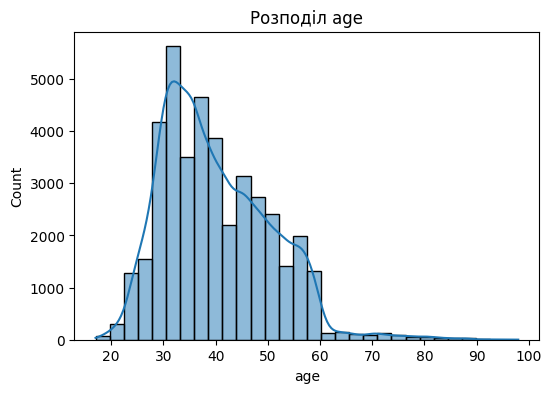

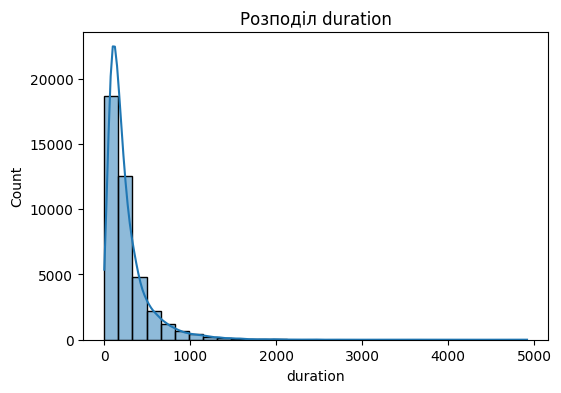

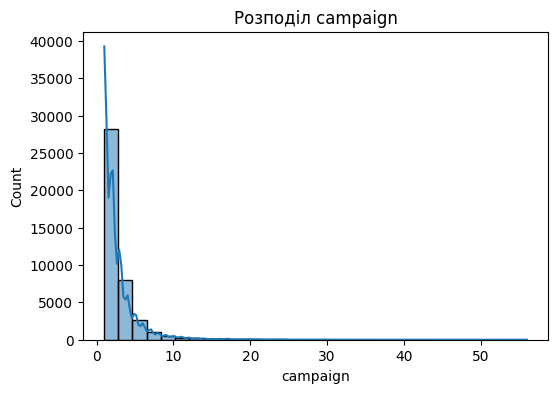

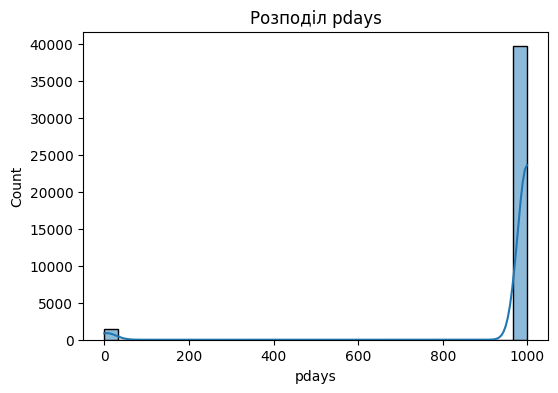

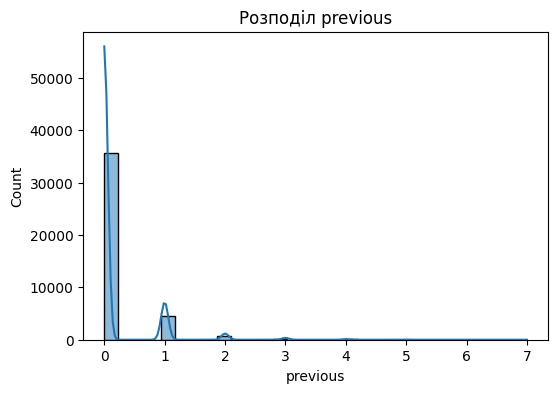

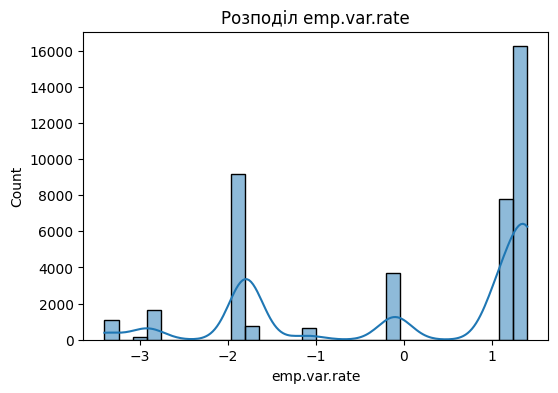

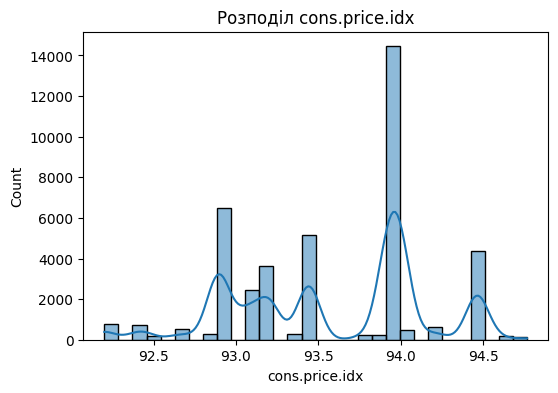

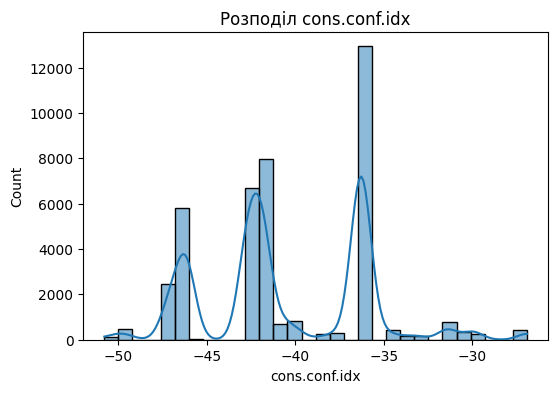

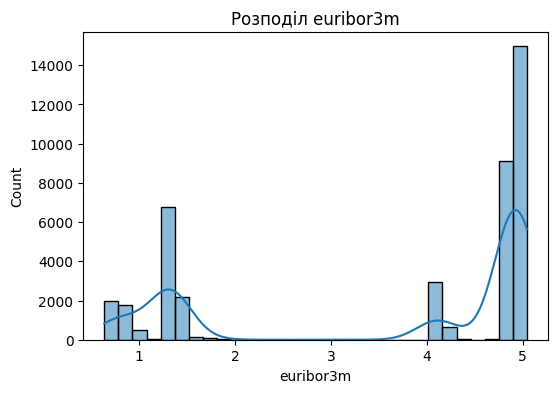

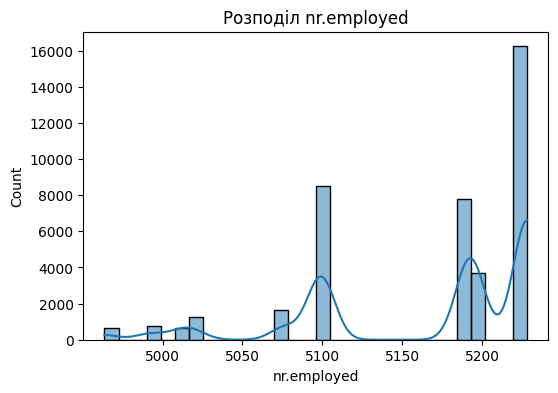

In [8]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Розподіл {col}")
    plt.show()

**Висновок**

pdays і previous показують, що більшість клієнтів контактували вперше.

duration має сильний розкид. Це важлива змінна для прогнозу (довгі дзвінки часто означають більшу ймовірність успіху).

campaign показує, що деяких клієнтів «переконували» багато разів.

# Аналіз категоріальних змінних


In [9]:
df.select_dtypes(include = "object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [10]:
len(df.select_dtypes(include = "object").columns)

11

Дані містять 11 категоріальних змінних

# Статистичний звіт для категоріальних змінних

In [11]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Інтерпретація по змінним


**job (робота)**

12 унікальних професій.

Найчастіше: admin. (≈10 422 клієнти).
Це найбільша професійна група у вибірці.

**marital (сімейний стан)**

4 категорії.

Найчастіше: married (≈24 928 клієнтів).
Більшість клієнтів одружені.

**education (освіта)**

8 категорій.

Найчастіше: university.degree (≈12 168 клієнтів).
Значна частина клієнтів має вищу освіту.

**default (наявність дефолту по кредиту)**

3 категорії (yes/no/unknown).

Найчастіше: no (≈32 588 клієнтів).
Більшість клієнтів не мають дефолтів.

**housing (іпотека)**

3 категорії.

Найчастіше: yes (≈21 576 клієнтів).
Половина клієнтів має іпотеку.

**loan (споживчий кредит)**

3 категорії.

Найчастіше: no (≈33 950 клієнтів).
Більшість клієнтів не мають кредитів.

**contact (тип контакту)**

2 категорії.

Найчастіше: cellular (≈26 144 клієнти).
Кампанія в основному проводилася через мобільний телефон.

**month (місяць контакту)**

10 категорій.

Найчастіше: may (≈13 769 контактів).
Найбільше дзвінків було у травні.

**day_of_week (день тижня)**

5 категорій.

Найчастіше: thu (≈8 623 контакти).
Найбільше дзвінків робили у четвер.

**poutcome (результат попередньої кампанії)**

3 категорії.

Найчастіше: nonexistent (≈35 563 клієнти).
Для більшості клієнтів попередніх кампаній не було.

**y (цільова змінна — чи підписав клієнт депозит)**

2 категорії.

Найчастіше: no (≈36 548 клієнтів).
Кампанія мала низький відсоток успіху (≈11% «yes»).

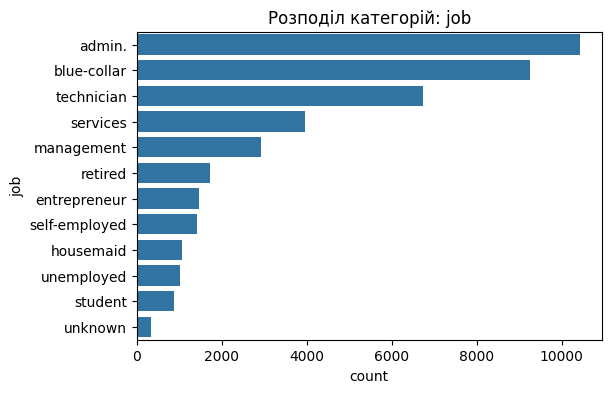

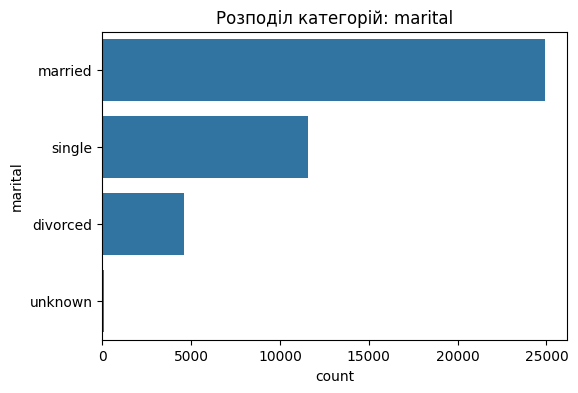

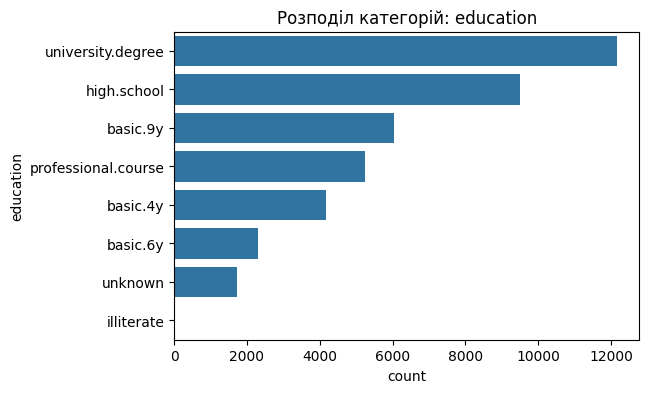

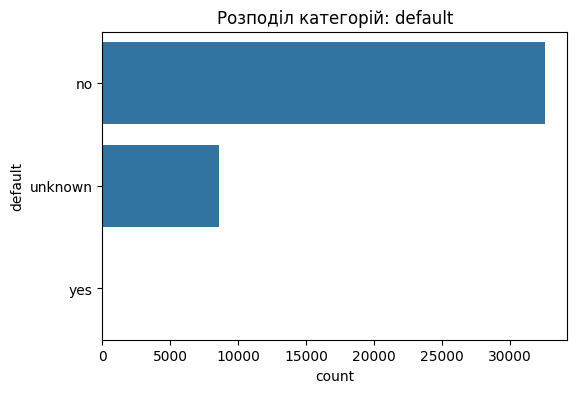

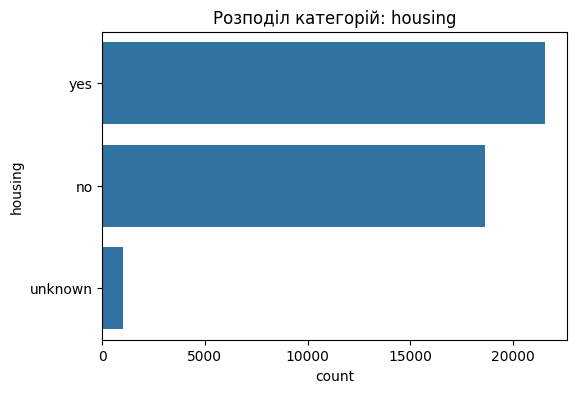

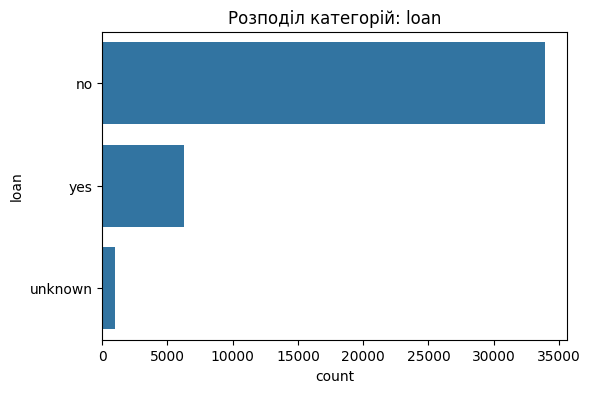

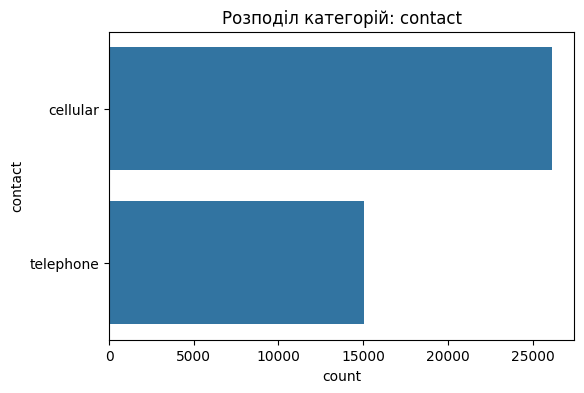

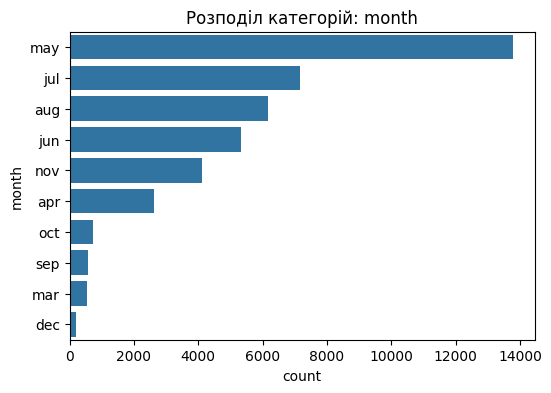

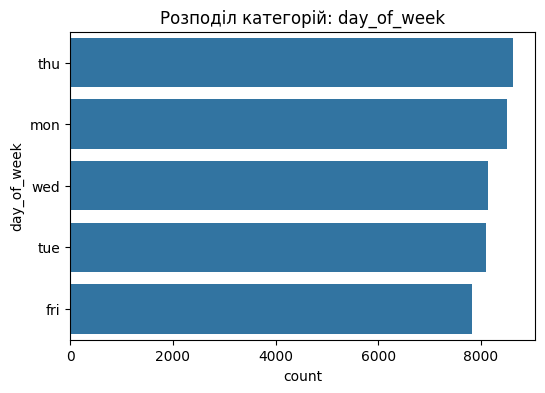

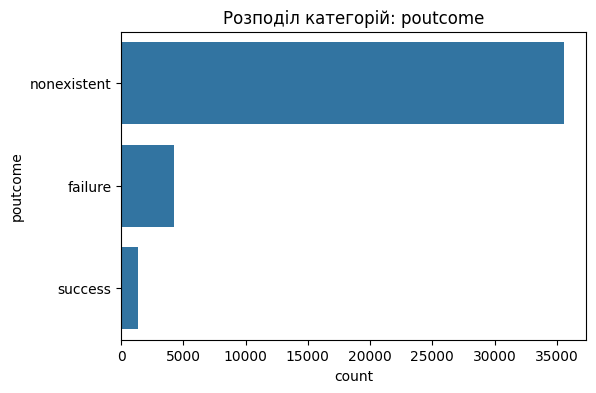

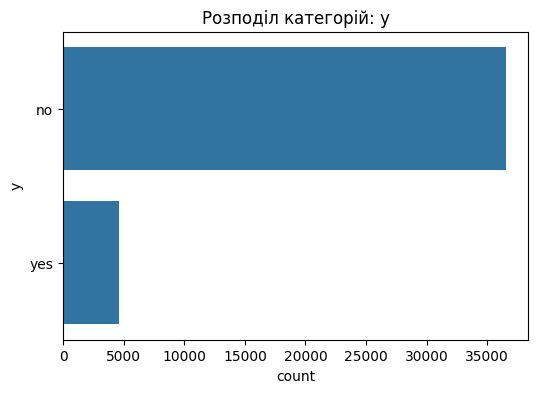

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Розподіл категорій: {col}")
    plt.show()

**Висновок**

Дисбаланс цільової змінної: більшість клієнтів відповіли «no».

Основна група клієнтів: одружені, з вищою освітою, працюють admin., мають іпотеку, але не мають інших кредитів.

Контакти: переважно через мобільний телефон, найбільше у травні та по четвергах.

Попередні кампанії: для більшості клієнтів вони не проводилися.

# Кореляційний аналіз числових змінних


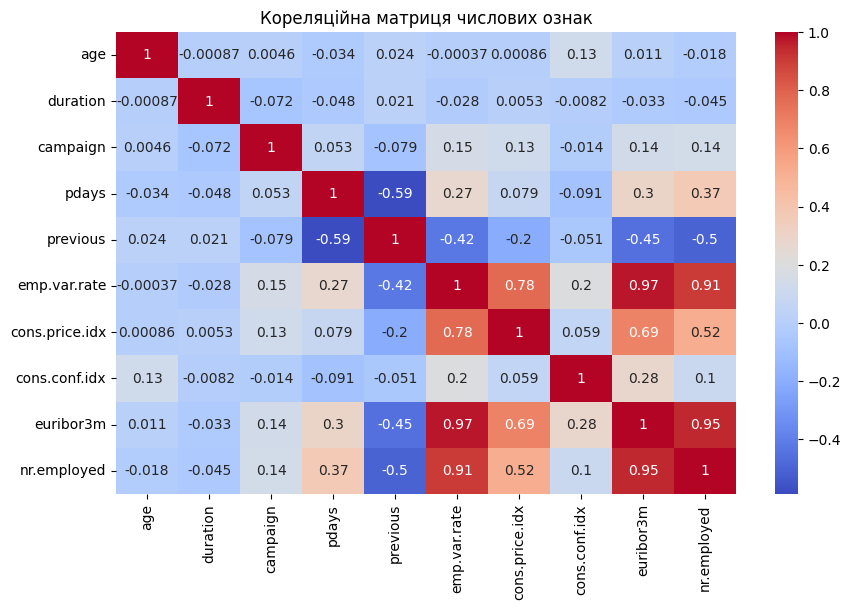

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця числових ознак")
plt.show()


## Oсновні спостереження

**Вік (age)**

Майже не корелює з іншими змінними (усі значення близькі до 0).
Це означає, що вік клієнтів незалежний від економічних показників чи кількості контактів.

**Тривалість дзвінка (duration)**

Дуже слабкі кореляції з усіма змінними.
Це підтверджує, що duration — унікальна ознака, але її краще не використовувати в моделі, тому що ця ознака недоступна на момент прийняття рішення.

**Кількість контактів у кампанії (campaign)**

Слабкі позитивні кореляції з макроекономічними змінними (emp.var.rate, euribor3m, nr.employed).
Немає сильних зв’язків - ця змінна більш «поведінкова», ніж економічна.

**pdays та previous**

Сильна негативна кореляція (-0.59).
Логічно: якщо pdays=999 (не контактували), то previous=0.
Це дублюючі змінні.

**Макроекономічні змінні (emp.var.rate, euribor3m, nr.employed, cons.price.idx)**

Дуже сильні позитивні кореляції:
emp.var.rate - euribor3m (0.97)
euribor3m - nr.employed (0.95)
emp.var.rate - nr.employed (0.91)
emp.var.rate - cons.price.idx (0.78)

Це означає, що вони майже дублюють одне одного, тобто є мультиколінеарність.

**Індекс споживчої довіри (cons.conf.idx)**

Слабкі кореляції з іншими змінними.


# Розподіл цільової змінної


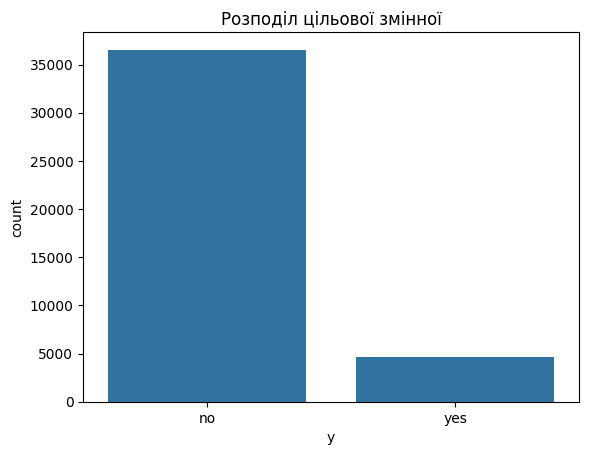

In [14]:
sns.countplot(x=df['y'])
plt.title("Розподіл цільової змінної")
plt.show()


# Взаємозв’язки змінних


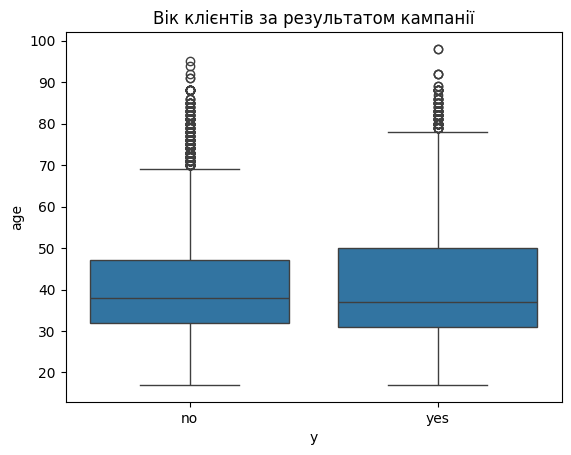

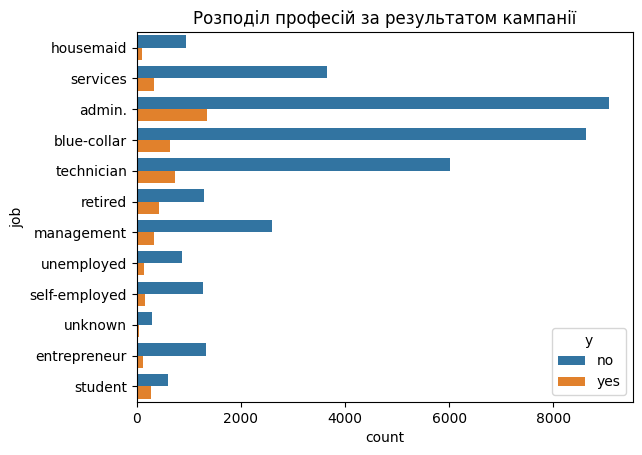

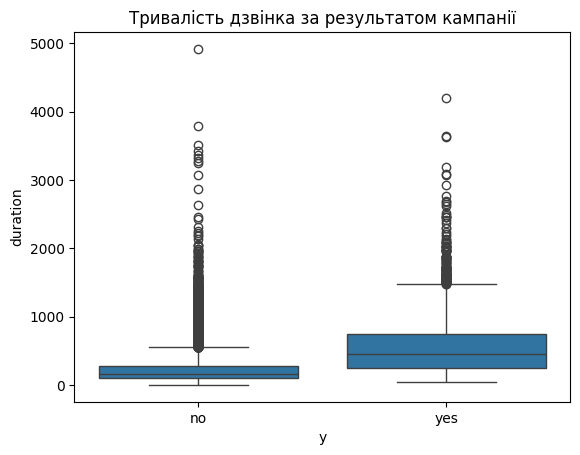

In [15]:
# Вік vs результат
sns.boxplot(x=df['y'], y=df['age'])
plt.title("Вік клієнтів за результатом кампанії")
plt.show()

# Професія vs результат
sns.countplot(y=df['job'], hue=df['y'])
plt.title("Розподіл професій за результатом кампанії")
plt.show()

# Тривалість дзвінка vs результат
sns.boxplot(x=df['y'], y=df['duration'])
plt.title("Тривалість дзвінка за результатом кампанії")
plt.show()



# Аналіз мультиколінеарності (VIF)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].drop(columns=['duration'])  # duration виключаємо (витік інформації)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


          feature           VIF
0             age     16.047285
1        campaign      1.912528
2           pdays     44.351941
3        previous      2.000394
4    emp.var.rate     28.909767
5  cons.price.idx  22521.657289
6   cons.conf.idx    120.061541
7       euribor3m    226.226918
8     nr.employed  26719.491225


**age - 16.047285**\
Висока мультиколінеарність. Може частково дублювати інші офактори.

**campaign - 1.912528**\
Низька мультиколінеарність, не залежна зміна.

**pdays - 44.351941**\
Дуже висока мультиколінеарність, сильно повєязана з previous.

**previous - 2.000394**\
Низька мультиколінеарність

**emp.var.rate  -   28.909767\
cons.price.idx - 22521.657289\
cons.conf.idx -   120.061541\
euribor3m -   226.226918\
nr.employed - 26719.491225**\
Як бачимо у всіх цих макропоказників мультиколінеарність від високої до найвищої мультиколінеарності

Отже макроекономічні змінні emp.var.rate, cons.price.idx,cons.conf.idx, euribor3m, nr.employed дуже сильно корелюють між собою тому залишимо найбільш інформативні з них.

Залишаємо cons.conf.idx - у нього найменші показники кореляції з іншимим макроекономічними змінними, а отже він додає незалежну інформацію.

А також залишаємо euribor3m - це ключовий макроекономічний показник — 3‑місячна міжбанківська ставка. він дуже чутливий до змін в економіці, він дуже корелює з іншими макроекономічними показниками(як видно з кореляційної матриці) а отже узагальнює їх всіх.



# Баланс Класів

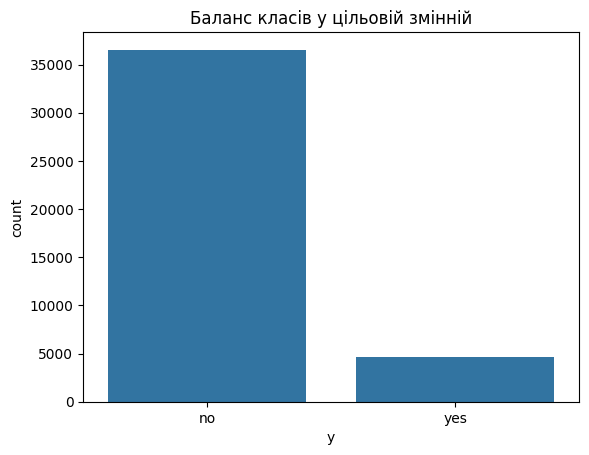

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [17]:
sns.countplot(x=df['y'])
plt.title("Баланс класів у цільовій змінній")
plt.show()

print(df['y'].value_counts(normalize=True))


Отже, маємо сильний дисбаланс класів, лише 11 відсотків погодились на депозит.

Якщо залишимо так як є, то модель може завжди передбачати no, що фактично буде неправильним передбаченням.

Відповідно метрика aссuracy буде вводити в оману, бо вона вгадує більшість.

Для оцінки якості моделей будемо використовувати метрики ROC‑AUC

А для балансу між мінімізуванням витрат на дзвінки та максимізуванням кількості залечених клієнтів - F1-score



# Сегментаційний аналіз

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


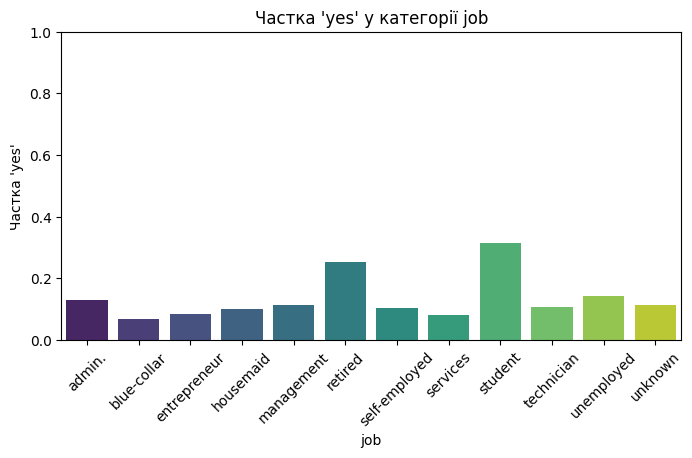

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


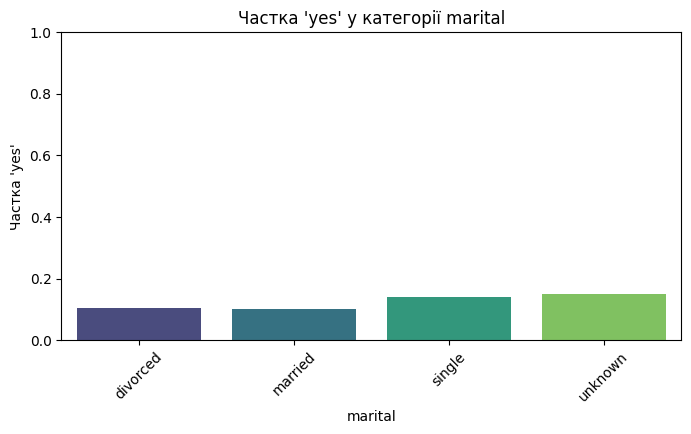

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


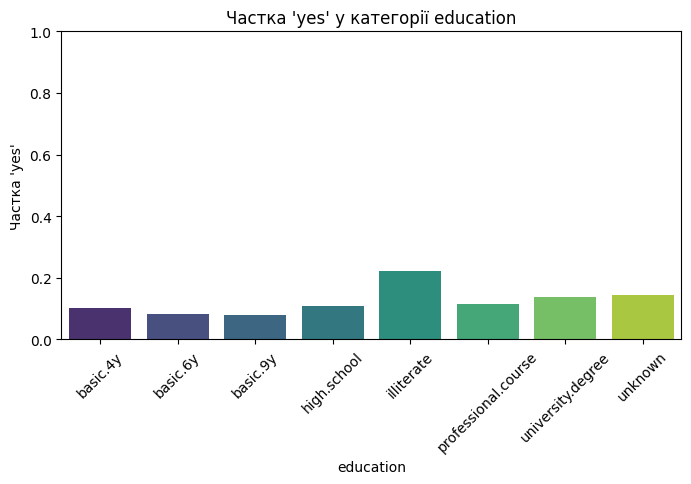

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


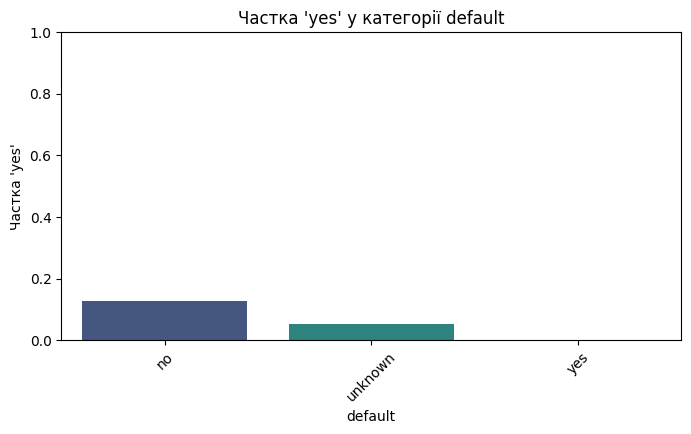

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


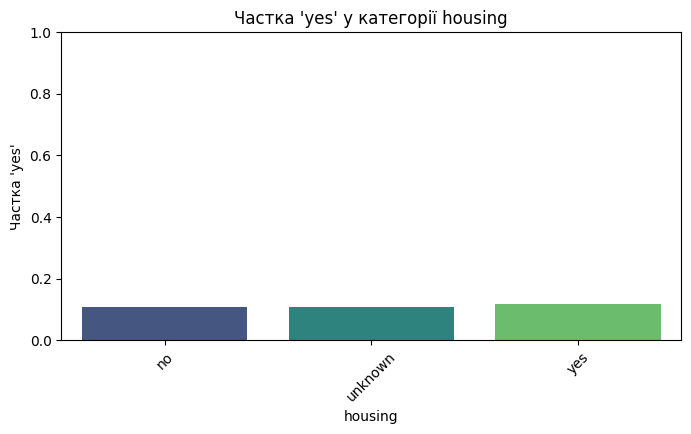

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


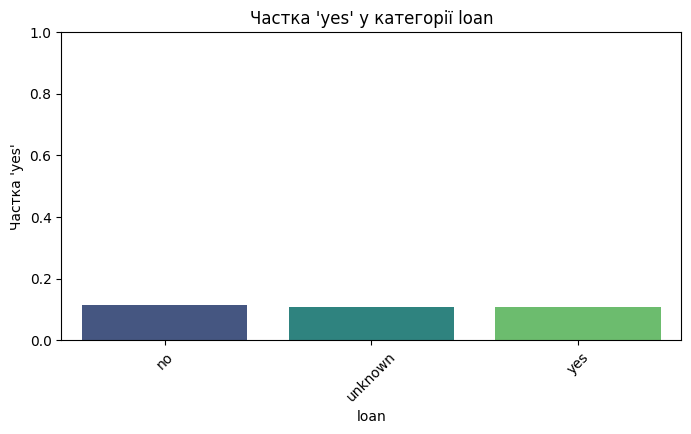

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


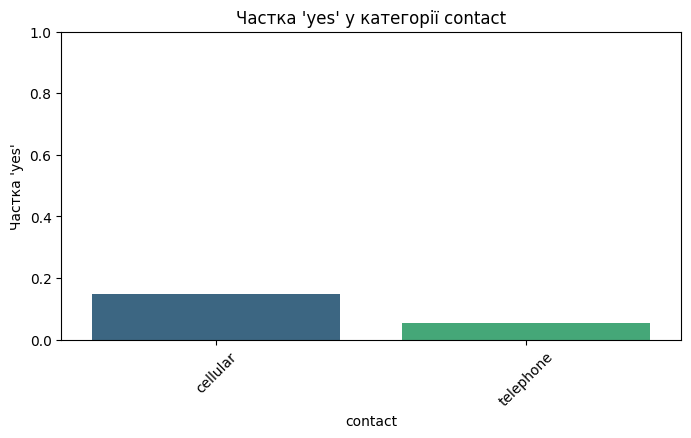

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


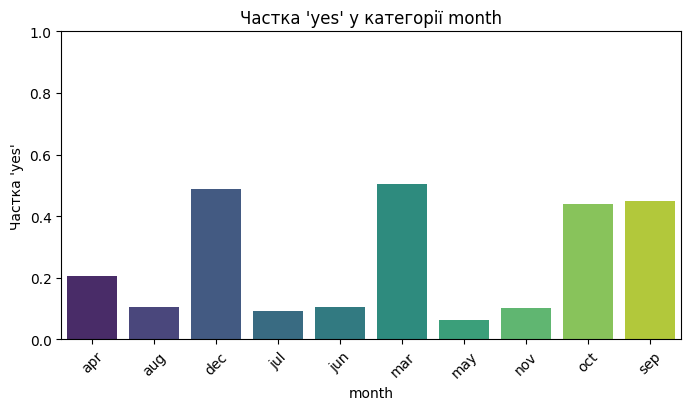

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


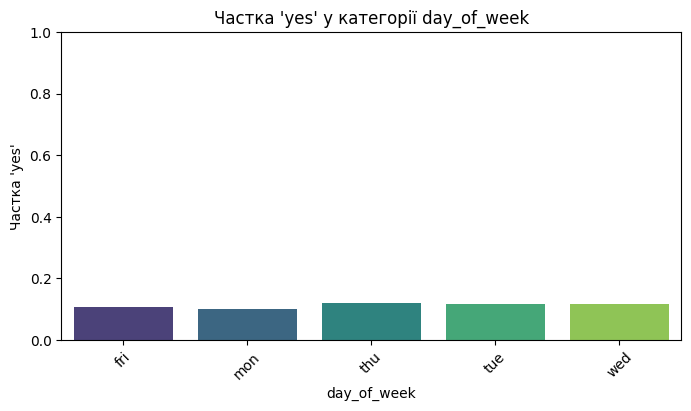

/tmp/ipython-input-1038570868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")


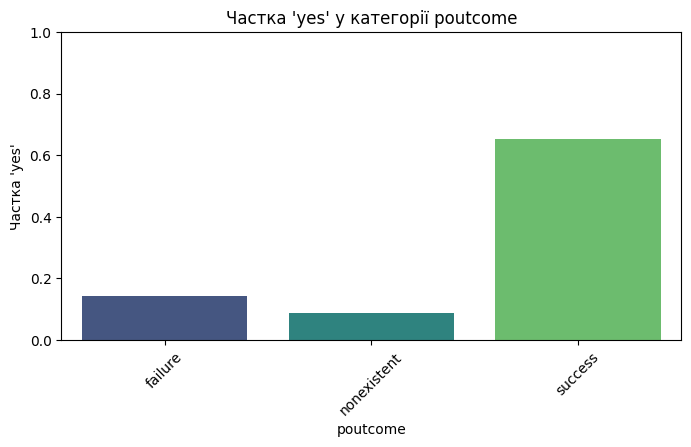

In [18]:

df['y_bin'] = (df['y'] == 'yes').astype(int)

cat_cols = df.select_dtypes(include=['object']).columns.drop('y')

for col in cat_cols:
    plt.figure(figsize=(8,4))

    # Частка "yes" у кожній категорії
    prop_yes = df.groupby(col)['y_bin'].mean().reset_index()

    sns.barplot(data=prop_yes, x=col, y='y_bin', palette="viridis")

    plt.title(f"Частка 'yes' у категорії {col}")
    plt.ylabel("Частка 'yes'")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylim(0,1)
    plt.show()


**Найперспективніші сегменти:** \
студенти, пенсіонери, люди з вищою освітою, ті, у кого попередній контакт був успішним, і ті, кому дзвонять у  місяці (березень, вересень, жовтень, грудень).

**Найменш перспективні:**\
робітники «blue-collar», підприємці, клієнти з дефолтом,невідомим статусом, дзвінки у травні та липні.

**Ключові фактори для бізнесу:** \
професія, освіта, попередній результат кампанії, місяць контакту, тип контакту.

#Виявлення Викидів


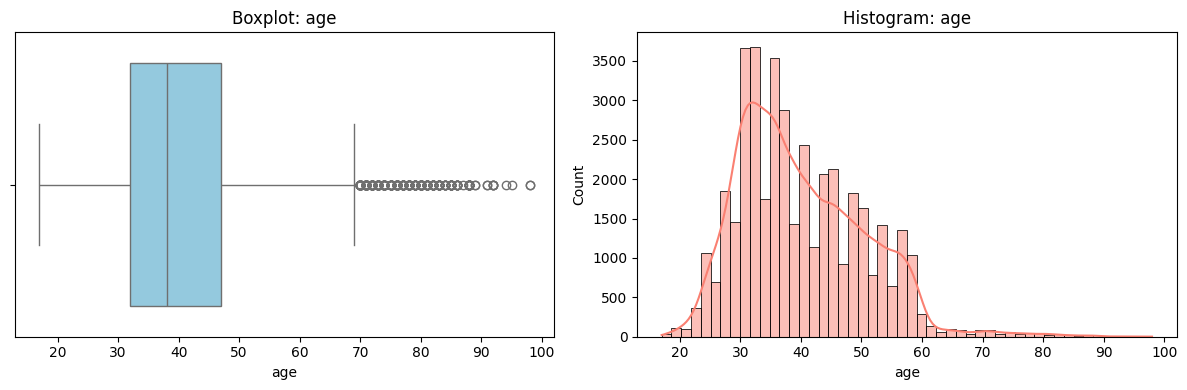

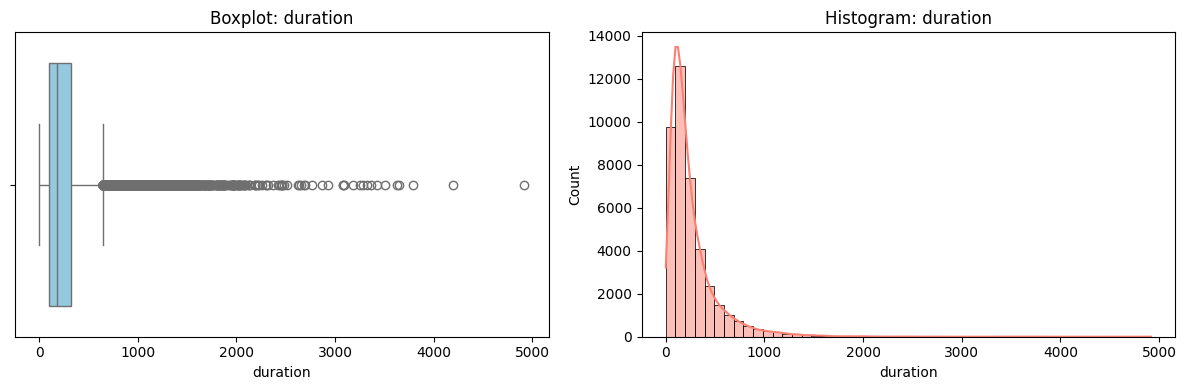

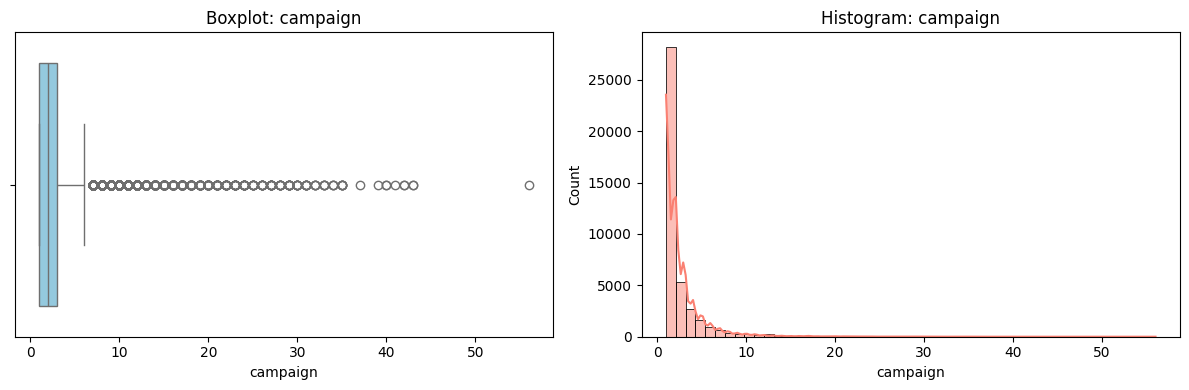

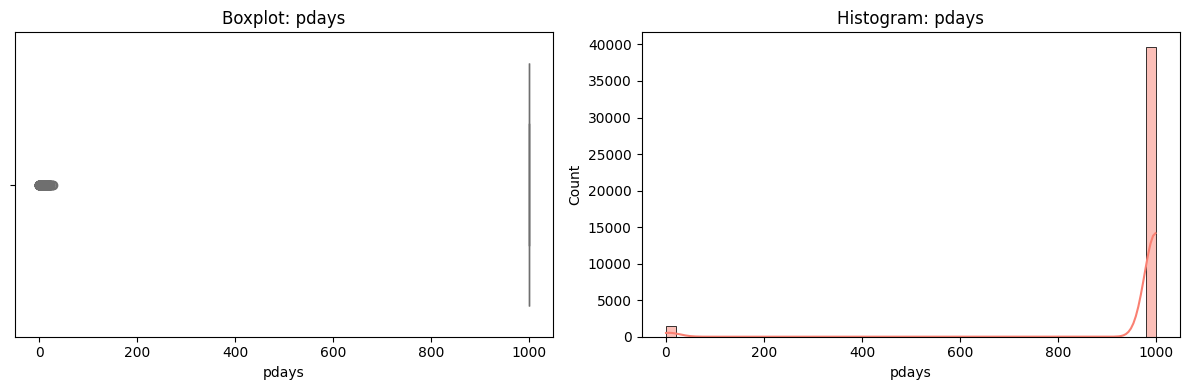

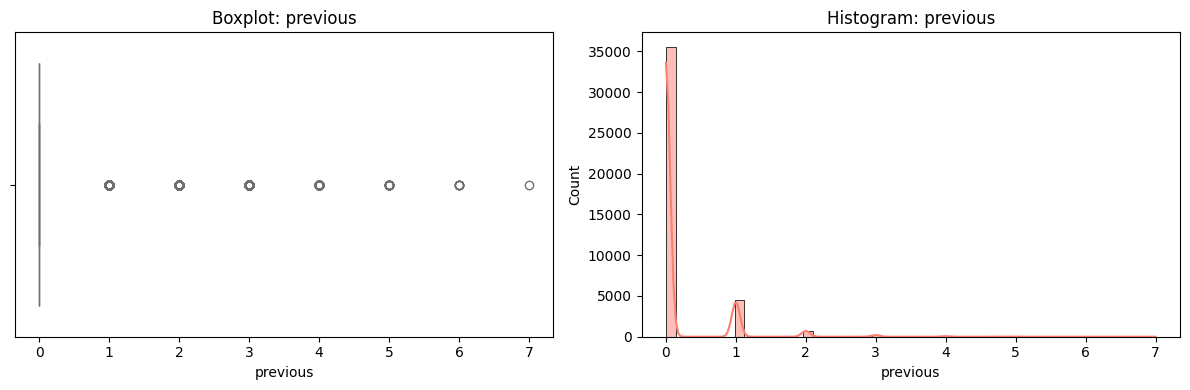

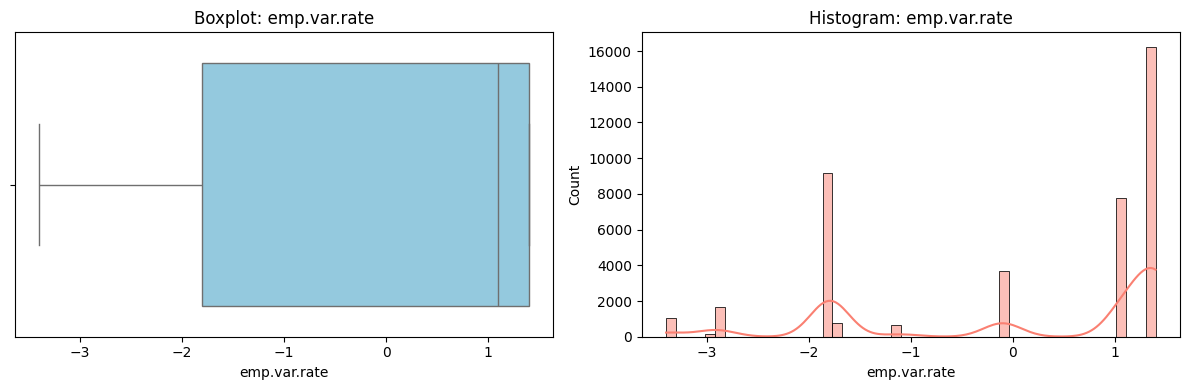

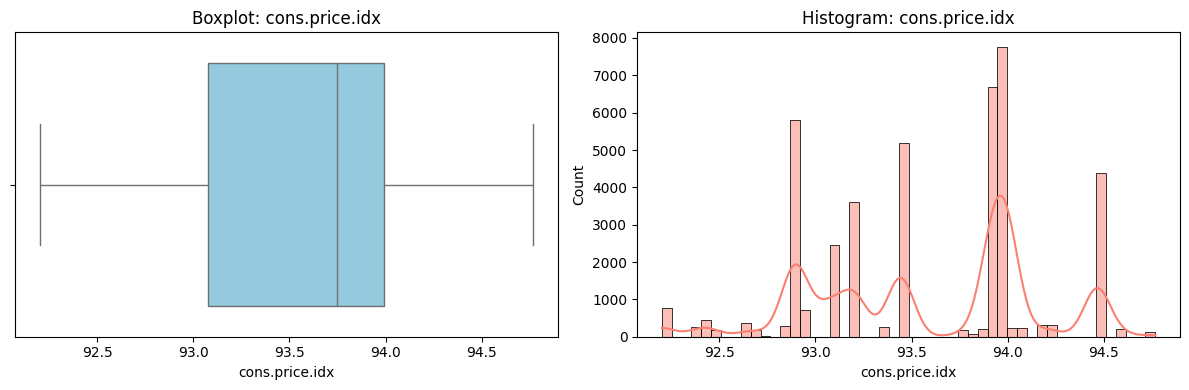

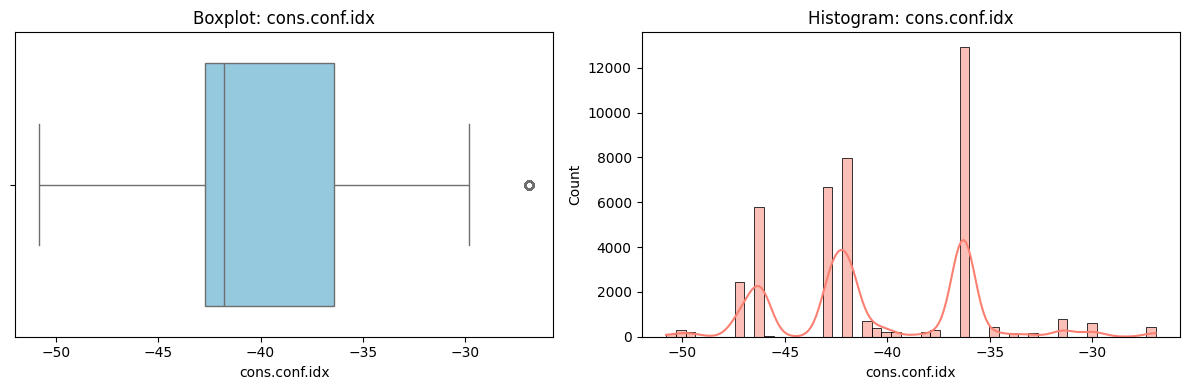

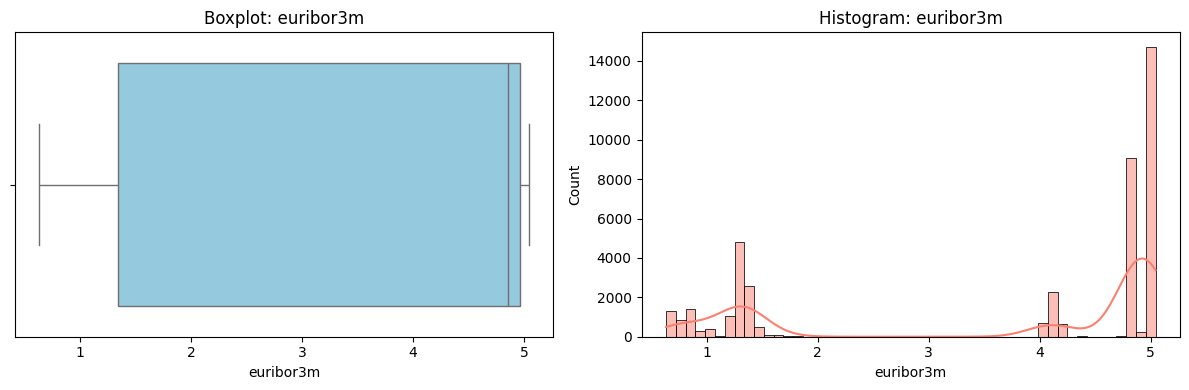

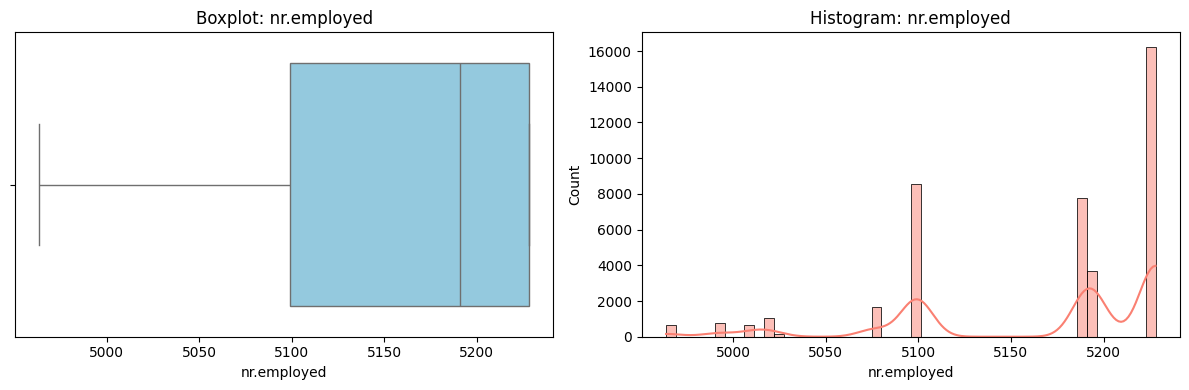

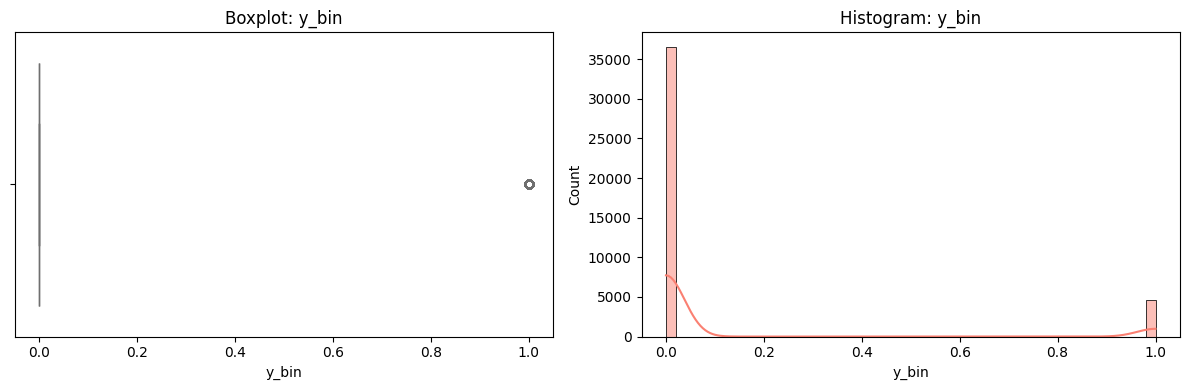

            column  iqr_outliers  zscore_outliers
0              age           469              369
1         duration          2963              861
2         campaign          2406              869
3            pdays          1515             1515
4         previous          5625             1064
5     emp.var.rate             0                0
6   cons.price.idx             0                0
7    cons.conf.idx           447                0
8        euribor3m             0                0
9      nr.employed             0                0
10           y_bin          4640                0


In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns

outlier_summary = []

for col in num_cols:
    # IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower) | (df[col] > upper)]

    # Z-score
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers_z = df.loc[df[col].dropna().index[z_scores > 3]]

    # Зберігаємо статистику
    outlier_summary.append({
        "column": col,
        "iqr_outliers": len(outliers_iqr),
        "zscore_outliers": len(outliers_z)
    })

    # Візуалізація
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0], color="skyblue")
    axes[0].set_title(f"Boxplot: {col}")

    # Histogram
    sns.histplot(df[col], bins=50, kde=True, ax=axes[1], color="salmon")
    axes[1].set_title(f"Histogram: {col}")

    plt.tight_layout()
    plt.show()

# Підсумкова таблиця з кількістю викидів
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)


Отже, як бачимо викиди у нас це не шум а реальні рідкісні дані.

Для обробки цих даних, можемо використати бінінг для категорій age, compaine, previous.

Це допоможе зменшити вплив викидів та зробити дані більше інтерпретованими.

# Препроцесинг даних

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Створюємо нову ознаку contacted_before
df_model['contacted_before'] = ((df_model['pdays'] != 999) | (df_model['previous'] > 0)).astype(int)

# Прибираємо зайві колонки
df_model = df_model.drop(columns=['duration', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx', 'nr.employed'])
# залишаємо тільки euribor3m і cons.conf.idx серед макро

# Бінінг числових ознак
# age 5 бінів
df_model['age_bin'] = pd.qcut(df_model['age'], q=5, labels=False, duplicates='drop')

# campaign 5 бінів
df_model['campaign_bin'] = pd.qcut(df_model['campaign'], q=5, labels=False, duplicates='drop')

# Визначаємо числові та категоріальні
num_cols = ['age_bin', 'campaign_bin', 'euribor3m', 'cons.conf.idx', 'contacted_before']
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

target = 'y'

# One-Hot Encoding для категоріальних
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Train/Test split
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Масштабування числових
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# Моделювання

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("LogisticRegression")
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

LogisticRegression
ROC-AUC: 0.7995823800650974
              precision    recall  f1-score   support

          no       0.95      0.84      0.89      7310
         yes       0.34      0.67      0.45       928

    accuracy                           0.82      8238
   macro avg       0.65      0.75      0.67      8238
weighted avg       0.88      0.82      0.84      8238



In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

print("kNN")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_knn))
print(classification_report(y_test, y_pred_knn))


kNN
ROC-AUC: 0.7308412248219255
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7310
         yes       0.51      0.23      0.32       928

    accuracy                           0.89      8238
   macro avg       0.71      0.60      0.63      8238
weighted avg       0.86      0.89      0.87      8238



In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
ROC-AUC: 0.7965075003537903
              precision    recall  f1-score   support

          no       0.95      0.86      0.90      7310
         yes       0.37      0.63      0.46       928

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.68      8238
weighted avg       0.88      0.84      0.85      8238



In [24]:
#Базова модель
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
lgbm.fit(X_train, y_train)

y_pred_lgb = lgbm.predict(X_test)
y_proba_lgb = lgbm.predict_proba(X_test)[:, 1]

print("LightGBM (baseline)")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM (baseline)
ROC-AUC: 0.8125571960941554
              precision    recall  f1-score   support

          no       0.95      0.88      0.91      7310
         yes       0.40      0.66      0.50       928

    accuracy                           0.85      8238
   macro avg       0.68      0.77      0.71      8238
weighted avg       0.89      0.85      0.87      8238



In [25]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'num_leaves': np.arange(20, 150, 10),
    'max_depth': np.arange(3, 15, 1),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': np.arange(100, 500, 50)
}

rs = RandomizedSearchCV(
    lgb.LGBMClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)
print("Best params (RandomizedSearch):", rs.best_params_)
print("Best ROC-AUC (CV):", rs.best_score_)

best_lgbm_rs = rs.best_estimator_


[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Best params (RandomizedSearch): {'num_leaves': np.int64(40), 'n_estimators': np.int64(200), 'max_depth': np.int64(11), 'learning_rate': 0.01}
Best ROC-AUC (CV): 0.7930764835059757


In [26]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import lightgbm as lgb

def objective(params):
    model = lgb.LGBMClassifier(
        num_leaves=int(params['num_leaves']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    return {'loss': -auc, 'status': STATUS_OK}

space = {
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'learning_rate': hp.choice('learning_rate', [0.01, 0.05, 0.1, 0.2]),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 10)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30, trials=trials)
print("Best params (Hyperopt):", best)


[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [27]:
#LightGBM з параметрами RandomizedSearchCV

lgbm_rs = lgb.LGBMClassifier(
    num_leaves=40,
    n_estimators=200,
    max_depth=11,
    learning_rate=0.01,
    class_weight='balanced',
    random_state=42
)
lgbm_rs.fit(X_train, y_train)

y_pred_rs = lgbm_rs.predict(X_test)
y_proba_rs = lgbm_rs.predict_proba(X_test)[:, 1]

print("LightGBM (RandomizedSearch best params)")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rs))
print(classification_report(y_test, y_pred_rs))

[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM (RandomizedSearch best params)
ROC-AUC: 0.8153440315580923
              precision    recall  f1-score   support

          no       0.95      0.87      0.91      7310
         yes       0.40      0.66      0.50       928

    accuracy                           0.85      8238
   macro avg       0.68      0.77      0.70      8238
weighted avg       0.89      0.85      0.87      8238



In [28]:
# LightGBM з параметрами Hyperopt

lgbm_hopt = lgb.LGBMClassifier(
    num_leaves=42,
    n_estimators=350,
    max_depth=3,
    learning_rate= 0.01,
    class_weight='balanced',
    random_state=42
)
lgbm_hopt.fit(X_train, y_train)

y_pred_hopt = lgbm_hopt.predict(X_test)
y_proba_hopt = lgbm_hopt.predict_proba(X_test)[:, 1]

print("LightGBM (Hyperopt best params)")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_hopt))
print(classification_report(y_test, y_pred_hopt))

[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

# Порівняння якості моделей

In [29]:
data = {
    "Model": [
        "Logistic Regression",
        "kNN",
        "Decision Tree",
        "LightGBM (baseline)",
        "LightGBM (RandomizedSearch)",
        "LightGBM (Hyperopt)"
    ],
    "ROC_AUC": [0.7996, 0.7308, 0.7965, 0.8126, 0.8153, 0.8058],
    "Acc": [0.82, 0.89, 0.84, 0.85, 0.85, 0.82],
    "P_no": [0.95, 0.91, 0.95, 0.95, 0.95, 0.95],
    "R_no": [0.84, 0.97, 0.86, 0.88, 0.87, 0.84],
    "F1_no": [0.89, 0.94, 0.90, 0.91, 0.91, 0.89],
    "P_yes": [0.34, 0.51, 0.37, 0.40, 0.40, 0.35],
    "R_yes": [0.67, 0.23, 0.63, 0.66, 0.66, 0.66],
    "F1_yes": [0.45, 0.32, 0.46, 0.50, 0.50, 0.46]
}

df = pd.DataFrame(data)
print(df.to_string(index=False))


                      Model  ROC_AUC  Acc  P_no  R_no  F1_no  P_yes  R_yes  F1_yes
        Logistic Regression   0.7996 0.82  0.95  0.84   0.89   0.34   0.67    0.45
                        kNN   0.7308 0.89  0.91  0.97   0.94   0.51   0.23    0.32
              Decision Tree   0.7965 0.84  0.95  0.86   0.90   0.37   0.63    0.46
        LightGBM (baseline)   0.8126 0.85  0.95  0.88   0.91   0.40   0.66    0.50
LightGBM (RandomizedSearch)   0.8153 0.85  0.95  0.87   0.91   0.40   0.66    0.50
        LightGBM (Hyperopt)   0.8058 0.82  0.95  0.84   0.89   0.35   0.66    0.46


Порівняння моделей показало, що LightGBM з налаштуванням параметрів (RandomizedSearch або Hyperopt) стабільно перевершує класичні алгоритми (Logistic Regression, Decision Tree, kNN).

Модель забезпечує високий рівень виявлення клієнтів, які погодяться на депозит (Recall ≈ 0.66–0.67)

При цьому зберігає прийнятний баланс точності (Precision ≈ 0.40) та загальної якості (F1 ≈ 0.50).

Класичні моделі поступаються: Logistic Regression має високий Recall, але низький Precision;

kNN — навпаки, високу точність, але дуже низький Recall.
Нажаль бінінг не дав очікуваного покращення, а навпаки у kNN навіть погіршив якість.

Отже, для бізнес‑цілей найкраще використовувати LightGBM з тюнінгом параметрів, оскільки він дає оптимальний баланс між кількістю знайдених клієнтів і точністю прогнозу.

Модель хороша і придатна для використання, але її можна ще покращити через балансування класів,оптимізацію порогу а також спробувати інші алгоритми бустингу.


# Топ найбільш впливових ознак для LightGBM з RandomizedSearch

                        feature  importance
3                     euribor3m        1793
0                           age        1047
1                      campaign         715
2                 cons.conf.idx         577
34            contact_telephone         427
49             poutcome_success         427
4              contacted_before         287
40                    month_may         226
42                    month_oct         182
28              default_unknown         167
26  education_university.degree         157
47              day_of_week_wed         138
15               job_technician         119
44              day_of_week_mon         113
13                 job_services         110
33                     loan_yes          96
11                  job_retired          89
10               job_management          87
19               marital_single          86
46              day_of_week_tue          80


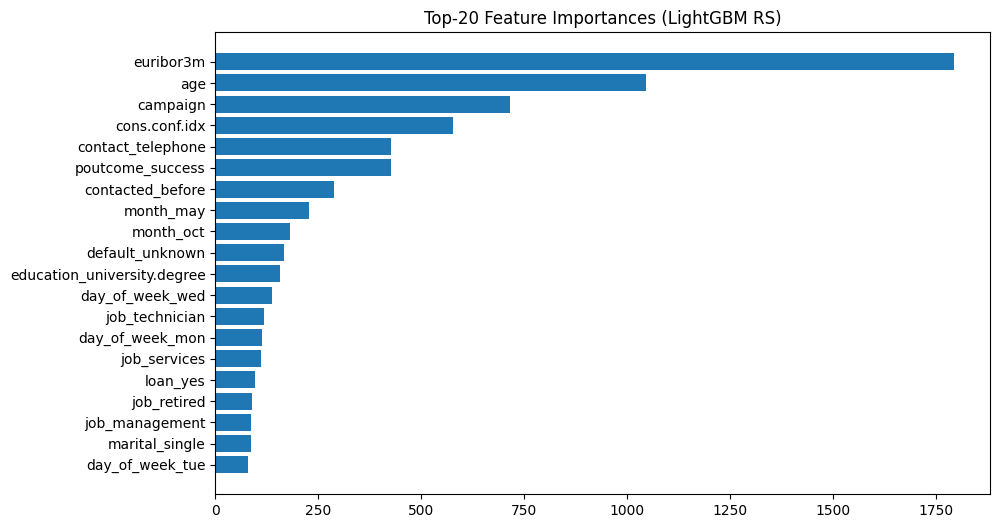

In [30]:
import matplotlib.pyplot as plt

importances = lgbm_rs.feature_importances_
features = X_train.columns

feat_imp = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp.head(20))

plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'][:20], feat_imp['importance'][:20])
plt.gca().invert_yaxis()
plt.title("Top-20 Feature Importances (LightGBM RS)")
plt.show()


**euribor3m	1793**

Відсоткова ставка напряму впливає на привабливість депозитів. Високі ставки стимулюють клієнтів вкладати гроші.

**age	1047**

Вік визначає фінансову поведінку: молодші клієнти схильні до ризику, старші — до заощаджень.

**campaign 715**

Кількість контактів у кампанії: надмірні дзвінки знижують ймовірність згоди.

**cons.conf.idx	577**

Індекс споживчої довіри відображає економічні настрої населення. У періоди песимізму люди рідше відкривають депозити.

**contact_telephone	427**

Канал контакту: телефонні дзвінки менш ефективні, ніж мобільні чи особисті.

**poutcome_success	427**

Якщо клієнт уже погоджувався у минулих кампаніях, шанс повторної згоди значно вищий.

**contacted_before	287**

Повторний контакт підвищує ймовірність позитивної відповіді.

**month_may	226**

Сезонність: у травні традиційно вищий відгук на пропозиції.

**month_oct	182**

Сезонність: у жовтні активність клієнтів нижча, що також впливає на прогноз.

**default_unknown	167**

Невідомий статус заборгованості може сигналізувати про ризикованість клієнта.

Пріоритет ознак виглядає адекватним і узгоджується з бізнес‑логікою.

# SHAP‑аналіз для LightGBM з RandomizedSearch

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


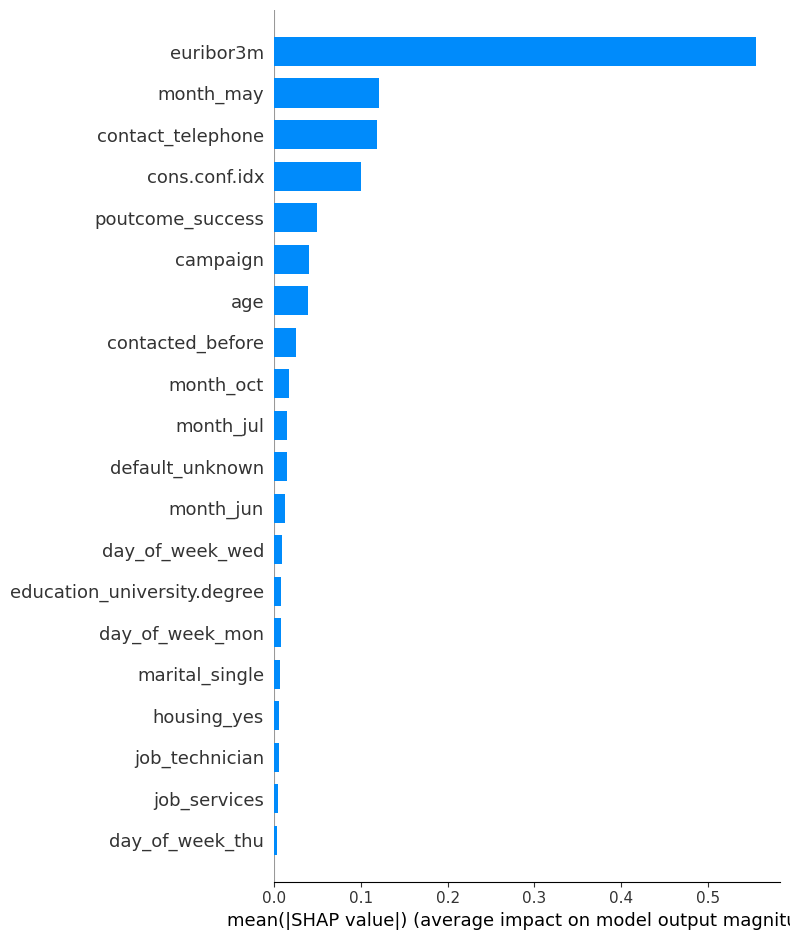

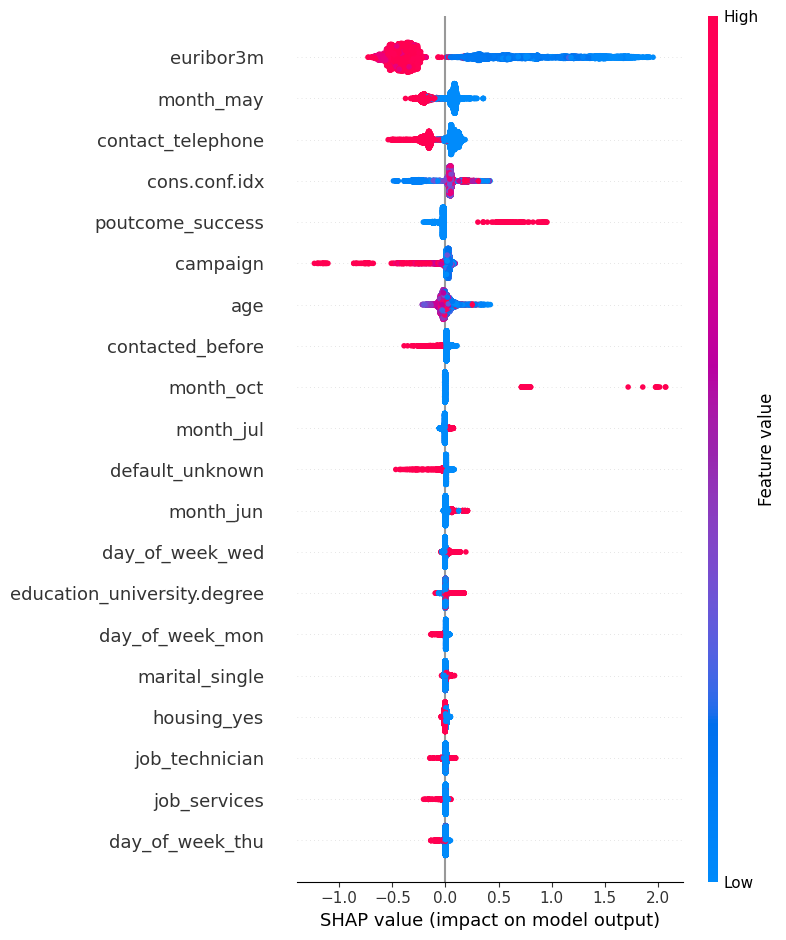

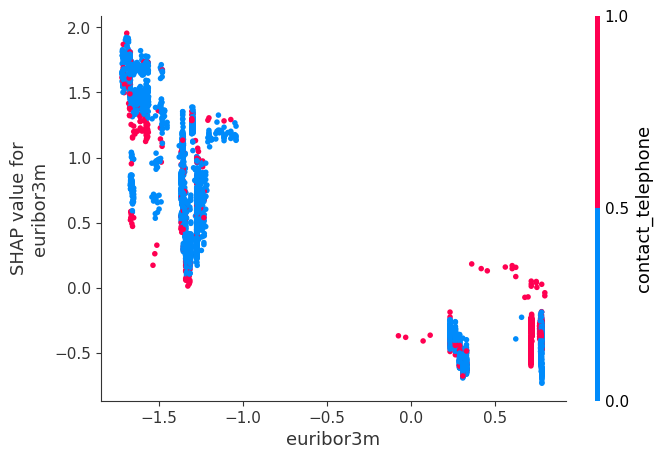

In [31]:
import shap

# 1. Створюємо explainer для LightGBM
explainer = shap.TreeExplainer(lgbm_rs)

# 2. Обчислюємо SHAP values для тестових даних
shap_values = explainer.shap_values(X_test)

# 3. Глобальна важливість ознак (bar plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 4. Детальний вплив ознак (dot plot)
shap.summary_plot(shap_values, X_test)

# 5. Приклад залежності для ключової ознаки
shap.dependence_plot("euribor3m", shap_values, X_test)


# Аналіз помилок LightGBM з RandomizedSearch

In [40]:
from sklearn.metrics import confusion_matrix

# Якщо y_test у форматі 'yes'/'no' → переводимо у 0/1
if pd.Series(y_test).dtype == 'object':
    y_true_bin = pd.Series(y_test).map({'no': 0, 'yes': 1}).values
else:
    y_true_bin = np.array(y_test).astype(int)

# Прогнози моделі
y_proba = lgbm_rs.predict_proba(X_test)[:, 1]
y_pred_bin = (y_proba >= 0.5).astype(int)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin).ravel()

print(f"TN (модель сказала «no», і насправді було «no») : {tn}")
print(f"FP (модель сказала «yes», але насправді було «no»)  : {fp}")
print(f"FN (модель сказала «no», але насправді було «yes») : {fn}")
print(f"TP (модель сказала «yes», і насправді було «yes»): {tp}")

TN (модель сказала «no», і насправді було «no») : 6394
FP (модель сказала «yes», але насправді було «no»)  : 916
FN (модель сказала «no», але насправді було «yes») : 317
TP (модель сказала «yes», і насправді було «yes»): 611


Модель краще передбачила відповідь - ні(6349), пропустила 317 клієнтів, які сказали так, передбачивши їх як - ні.

Модель працює добре для класу «no», але слабше для «yes».

Треба підняти Recall (знизити поріг, збалансувати класи, додати ознаки) а також підняти Precision (правила для campaign, калібрування).


In [51]:

from sklearn.metrics import precision_score

# 1. Приводимо y_test у формат 0/1
y_true = pd.Series(y_test).map({'no': 0, 'yes': 1}).values

# 2. Ймовірності від моделі
y_proba = lgbm_rs.predict_proba(X_test)[:, 1]

# 3. Параметри для перебору
thresholds = [0.5, 0.6]
campaign_limits = [5, 6]

rows = []

for thr in thresholds:
    for limit in campaign_limits:
        # Прогнози за порогом
        y_pred = (y_proba >= thr).astype(int)

        # Бізнес-правило: якщо campaign > limit → "no"
        y_pred[X_test['campaign'] > limit] = 0

        # Confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Метрики
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        rows.append([thr, limit, tn, fp, fn, tp, round(prec,3), round(rec,3), round(f1,3)])

# 4. Вивід у вигляді таблиці
df = pd.DataFrame(rows, columns=["threshold","campaign_limit","TN","FP","FN","TP","Precision","Recall","F1"])
print(df)


   threshold  campaign_limit    TN   FP   FN   TP  Precision  Recall     F1
0        0.5               5  6421  889  324  604      0.405   0.651  0.499
1        0.5               6  6410  900  320  608      0.403   0.655  0.499
2        0.6               5  6639  671  356  572      0.460   0.616  0.527
3        0.6               6  6628  682  352  576      0.458   0.621  0.527


In [ ]:
threshold=0.6 + campaign_limit=5 дає найкращий баланс (менше FP, вищий F1)